In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

data_file = 'Enclosure_InsulationStuck2021-05-24 20-06-23.csv'

df = pd.read_csv(data_file)

df

,Time,Temperature set (C),Temperature measured (C)
0,41.837920,13.498837,19.033399
1,42.837829,13.478507,19.514813
2,43.838076,13.458177,19.500879
3,44.837326,13.478507,19.183416
4,45.838148,13.326652,19.431437
5,46.838392,13.509022,19.293252
6,47.838808,13.488672,19.348399
7,48.837039,13.478507,19.074201
8,49.838455,13.478507,19.115083
9,50.836922,13.468342,19.376044


In [42]:
window_size = 10
temp_set_rollling_avg= np.array(df.loc[:,'Temperature set (C)'].rolling(window = window_size, center = True).mean())
temp_measured_rollling_avg= np.array(df.loc[:,'Temperature measured (C)'].rolling(window = window_size, center = True).mean())

In [43]:
df['Temperature set (rolling mean) C'] = temp_set_rollling_avg
df['Temperature measured (rolling mean) C'] = temp_measured_rollling_avg

<IPython.core.display.Javascript object>


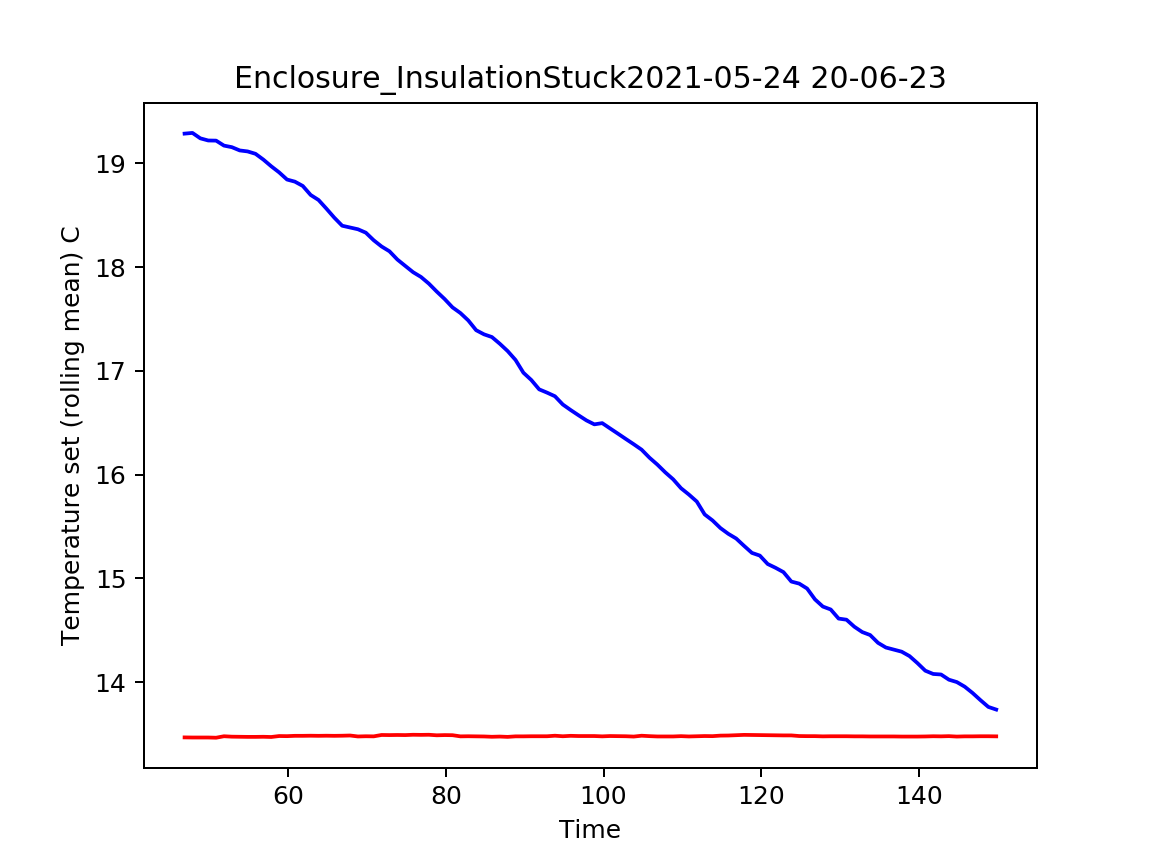

In [44]:
# Plot

plt.figure()
sns.lineplot(x = "Time", y = 'Temperature set (rolling mean) C', color = 'r', data =df)
sns.lineplot(x = "Time", y = 'Temperature measured (rolling mean) C', color = 'b', data = df)
plt.title(data_file[:-4])
# plt.savefig(data_file[:-4]+'.png', dpi = 300)
plt.show()

In [45]:
# Fit a line to estimate slope
p = np.polyfit(np.array(df["Time"]), np.array(df["Temperature measured (C)"]), deg = 1)
p[0]

-0.0570267025520996

In [ ]:
# Duct installed, No fan: -0.03684551
# No fan no duct (enclosure only): -0.0593734
# Duct installed + fan ON: -0.02263496
# Duct installed, Fan OFF: -0.03752431
# Enclosure only (Bigger Power supply): -0.06358272314324771
# ENclosure only (Smaller power supply): -0.0630065451067738
# Enclosure only (with Insulation): -0.07698356904560058

In [53]:
# Heat transfer calculations
Cp = 1 # 1kJ/kg K
rho_air = 1.22 #
Volume = 0.141 # m^3
Delta_T = 4
Time = 200

In [54]:
total_heat = lambda volume, delta_t: 1000*rho_air*volume*Cp*delta_t # heat in Joules

In [55]:
heat_transfer_rate = total_heat(Volume, Delta_T)/Time

In [56]:
print('Heat transfer rate: {} W'.format(heat_transfer_rate))

Heat transfer rate: 3.4403999999999995 W


In [ ]:
# DeepCool Heat transfer rate: 1.8435555555555558 W
# ClimateRite (full microscope chamber): 2.1502499999999998 W
# ClimateRite (full microscope chamber): 3.4403999999999995 W
